In [187]:
# import library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pythainlp
import pythaispell
from gingerit.gingerit import GingerIt
from langdetect import detect
import nltk
from keras import *
from keras.utils import to_categorical
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from pythainlp.corpus.common import thai_words
from pythainlp.tokenize import dict_trie
from pythainlp.tag.named_entity import ThaiNameTagger
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

In [188]:
# import data from Excel
df = pd.read_excel('./All_data.xlsx',sheet_name=None)

In [189]:
df1 = df['Sheet1'].drop(columns='subCategory')
df2 = df['155-7500'].drop(columns='subCategory')
df3 = df['7501-15001'].drop(columns='subCategory')
df4 = df['Sheet3'].drop(columns='subCategory')
df_cat = df['Category']
df_cat

,id,category
0,0,อุปกรณ์ อิเล็กทรอนิกส์
1,1,อุปกรณ์เสริม อิเล็กทรอนิกส์
2,2,ทีวีและเครื่องใช้ ไฟฟ้าในบ้าน
3,3,สุขภาพและความงาม
4,4,เด็กอ่อน และของเล่น
5,5,ซูเปอร์มาร์เก็ต และสัตว์เลี้ยง
6,6,บ้านและไลฟ์สไตล์
7,7,แฟชั่นผู้หญิง
8,8,แฟชั่นผู้ชาย
9,9,เครื่องประดับ


In [190]:
# Concatenate data from sheets
df = pd.concat([df1, df2,df3,df4], ignore_index=True)

In [193]:
df

,Category,Description
0,0,Smartphones
1,0,SAMSUNG Galaxy A20s *ประกันศูนย์ 1ปี*
2,0,อุปกรณ์ในกล่อง หัวชาร์จ / สาย USB Type-C
3,0,A20s ไม่ได้แถม หูฟัง / ฟิล์ม / เคส มาจากทางSAM...
4,0,ทางร้านต้องแกะกล่องสินค้าเพื่อนำใบประกันส่งบริ...
...,...,...
461043,11,หมวกโม่ง
461044,11,หมวก MOTOGP 46 YAMAHA
461045,11,หมวก MOTOGP 46 YAMAHA น้ำเงินราคา 590 บาท
461046,11,แบรนด์ Yamaha


In [203]:
xx = df['Description'].values
yy = df['Category'].values

In [207]:
xx.shape,yy.shape

((461048,), (461048,))

In [217]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx,yy, test_size=0.1, random_state=47,stratify=yy)
xx_train, xx_val, yy_train, yy_val = train_test_split(xx_train,yy_train, test_size=0.2, random_state=47,stratify=yy_train)

Text(0.5, 1.0, 'y val')

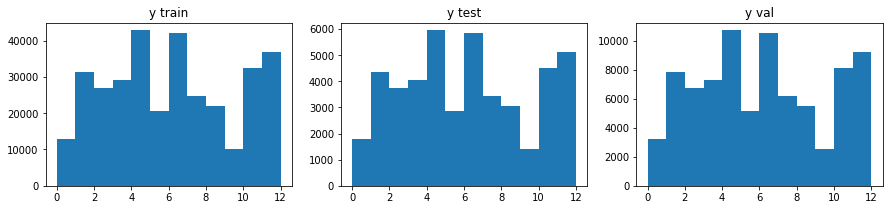

In [218]:
# Plot target distribution
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]

ax[0].hist(yy_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(yy_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(yy_val,bins=bins)
ax[2].set_title('y val')

In [ ]:
i=0
x_train = pd.DataFrame(columns=['Category', 'Description'])
x_val = pd.DataFrame(columns=['Category', 'Description'])
x_test = pd.DataFrame(columns=['Category', 'Description'])

while(i<12):
    df0 = df[df['Category']==i]
    X_train, X_test = train_test_split(df0, test_size=0.1, random_state=47,stratify=y)
    x_train = pd.concat([x_train,X_train],ignore_index=True)
    x_test = pd.concat([x_test,X_test],ignore_index=True)
    i = i+1

i=0
while(i<12):
    df0 = x_train[x_train['Category']==i]
    X_train, X_val = train_test_split(df0, test_size=0.2, random_state=47,stratify=y)
    x_train = pd.concat([x_train,X_train],ignore_index=True)
    x_val = pd.concat([x_val,X_val],ignore_index=True)
    i = i+1

In [220]:
xx_val,yy_val

(array(['ผลิตภัณฑ์ดูแลผิวหน้า', 'โปรแกรมการอบ : 15', 'เพศที่แนะนำ Unisex',
        ..., 'รุ่น VA-59', 'ลู่เดินกึ่งสเต็ป', 'เครื่องเล่นวิดีโอเกม New'],
       dtype=object), array([ 3,  2,  4, ...,  1, 10,  1], dtype=int64))

In [112]:
# training data
y_train = x_train['Category']
x_train = x_train['Description']

# test data
y_test = x_test['Category']
x_test = x_test['Description']

# validation data
y_val = x_val['Category']
x_val = x_val['Description']

In [221]:
type(xx_train)

numpy.ndarray

In [222]:
# custom dictionary
path_custom_dict = "./custom_dict.txt"

with open(path_custom_dict, 'r',encoding="utf8") as f:
    new_words = f.read().splitlines()
    
words = set(new_words).union(thai_words())
custom_dictionary = dict_trie(words)

In [223]:
import re
import string

# word correction for EN
#parser = GingerIt()

# download stopwords of TH and EN
nltk.download('words')
th_stop = tuple(thai_stopwords())
en_stop = tuple(get_stop_words('en'))
p_stemmer = PorterStemmer()

# clean the text
def clean_msg(msg): 
    
    # ลบ text ที่อยู่ใน []
    msg = re.sub(r'[<*●•►【】✨✈✅#?>]','', str(msg))
    #msg = re.sub(r'✅','',msg)
    # ลบ hashtag
    #msg = re.sub(r'#','',msg)
    #msg = re.findall(r"[\wก-๙]", str(msg))
    
    # Delete punctuation
    str_punc = string.punctuation.replace(".","")
    for c in str_punc:
        msg = re.sub(r'\{}'.format(c),'',str(msg))
    
    # ลบ separator เช่น \n \t
    msg = ' '.join(msg.split())
    
    return msg

# split to words from text
def split_word(text):
    words = word_tokenize(text,engine='newmm',custom_dict=custom_dictionary,keep_whitespace=False)

    # Remove stop words TH and EN
    words = [i for i in words if not i in th_stop and not i in en_stop]
    
    # รากศัพท์
    # EN
    #words = [p_stemmer.stem(i) for i in words]
    
    # TH
    tokens_temp=[]
    for i in words:
        w_syn = wordnet.synsets(i)
        if (len(w_syn)>0) and (len(w_syn[0].lemma_names('tha'))>0) and not (w_syn[0].lemma_names('tha')[0].isdigit()):
            #print(w_syn[0].lemma_names('tha'))
            if(w_syn[0].lemma_names('tha')[0]=='แบต'):
                tokens_temp.append(w_syn[0].lemma_names('tha')[1])
            #elif(w_syn[0].lemma_names('tha')[0].isdigit()):
                #tokens_temp.append(w_syn[0].lemma_names('tha')[2])
            else:
                tokens_temp.append(w_syn[0].lemma_names('tha')[0])
        else:
            tokens_temp.append(i)
    
    words = tokens_temp
    
    # delete whitespace
    #words = [i for i in words if not ' ' in i]

    return words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [129]:
split_word(clean_msg("test test ๑1.2.222"))

['test', 'test', '๑1.2.222']

In [224]:
# Clean the data
x_train = [clean_msg(text) for text in xx_train]
x_test = [clean_msg(text) for text in xx_test]
x_val = [clean_msg(text) for text in xx_val]

In [225]:
# mark word for spliting
x_train_word = ['|'.join(split_word(txt)) for txt in x_train]
x_test_word = ['|'.join(split_word(txt)) for txt in x_test]
x_val_word = ['|'.join(split_word(txt)) for txt in x_val]

In [230]:
x_train_word

['น.น.|350|ก.ก.',
 'เกือก|ชุด|สำหรับ|ชาย|New',
 'อุปกรณ์ไฟฟ้า|ขนาดเล็ก',
 'เสน่ห์|เสริมสร้าง|จินตนาการ',
 'It|can|easily|switch|four|different|dedicated|recording|patterns|suit|variety|audio|capture|needsHeadphone|amplifier|Impedance|16|ohmsPower|output|RMS|130|mWTHD|0.009|Frequency|response|15|Hz|–|22|kHzSignaltonoise|ratio|114|dB',
 'น้ำ|สะอาด|ปลอดภัย|ได้มาตรฐาน',
 'ผู้หญิง|New',
 'ออกแบบ|หลัก|สรีรศาสตร์|มุมมอง|ความปลอดภัย|สวม',
 'พลังงาน|ถ่าน|AAA|4|ก้อน',
 'กรดไขมัน|สร้าง|HDL|ช่วดลด|โคเลสเตอรอล',
 'Model|WOND|ZQ|385502',
 'ชนิด|แผ่น|ทำความ|เย็น|4090',
 'ขน|พรม|ขน|พรม|พิเศษ|4|ซม.|ถัก|ทอ|เครื่องจักร|ทันโลก|แน่น|นุ่ม|หลุด',
 'แบรนด์|Depex',
 'เคลือบ|สาร|ป้องกัน|รอยนิ้วมือ|หน้า|จอภาพ|คมชัด',
 'รับประกัน|สินค้า|ของแท้|100',
 'ขนาด|เลนส์|29|มม.',
 'ชนิด|ยางใน|TL',
 'ห้อย|โทร|ตกแต่ง|New',
 'Hydration|Blood|Orange|Essence|100|ml|.',
 'แบรนด์|OEM',
 'ค่า|แข็งแรง|ทน|การใช้งาน',
 'ปกป้อง|ชิ้น|เครื่องยนต์|หม้อน้ำ',
 'อุปกรณ์|ครบชุด|ติดตั้ง',
 'ผ้า|ซับ|น้ำลาย|ผ้าเช็ดมือ|เด็ก|ผ้า|ผูก|คอ|สามเหลี่ย

In [260]:
# define parameter for embedding layer

max_word = 20000
max_len = 30
embedding_size = 128

In [261]:
from keras.preprocessing import text
from keras.preprocessing import sequence

# Define Tokenizer
# split words with "|"
tokenizer = text.Tokenizer(num_words=max_word,split='|',filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n', lower=True) 
tokenizer.fit_on_texts(x_train_word)
tokenizer.word_index

{'การรับประกัน': 1,
 'ชนิด': 2,
 'แบรนด์': 3,
 'sku': 4,
 'รุ่น': 5,
 'th': 6,
 '1': 7,
 'อุปกรณ์': 8,
 'สำหรับ': 9,
 'ไม่มี': 10,
 'สินค้า': 11,
 'ประกัน': 12,
 '.': 13,
 'ขนาด': 14,
 'x': 15,
 'ชุด': 16,
 'เด็ก': 17,
 'สี': 18,
 '2': 19,
 'รถ': 20,
 'new': 21,
 '3': 22,
 'เกือก': 23,
 'วัสดุ': 24,
 'ทำ': 25,
 'ปี': 26,
 '4': 27,
 'กีฬา': 28,
 'ตัว': 29,
 'ระยะเวลา': 30,
 '5': 31,
 'ผ้า': 32,
 'เครื่อง': 33,
 'กระเป๋า': 34,
 'สาย': 35,
 'ผู้หญิง': 36,
 '100': 37,
 'cm': 38,
 'ชาย': 39,
 '6': 40,
 'ผิว': 41,
 'ใส่': 42,
 'ซม.': 43,
 'ไฟ': 44,
 'น.น.': 45,
 'นิ้ว': 46,
 'น้ำ': 47,
 '฿': 48,
 'ชิ้น': 49,
 'คุณภาพ': 50,
 'no': 51,
 'ระบบ': 52,
 'ข้างนอก': 53,
 'ใช้': 54,
 'เหมาะสำหรับ': 55,
 '10': 56,
 'ป้องกัน': 57,
 'brand': 58,
 'ของเล่น': 59,
 'เครื่องประดับ': 60,
 '8': 61,
 'เดือน': 62,
 'เอ': 63,
 'กล่อง': 64,
 'น.': 65,
 'ดี': 66,
 'กิจกรรม': 67,
 'ทำความสะอาด': 68,
 'ลด': 69,
 'เสริม': 70,
 'เกรด': 71,
 'อาหาร': 72,
 'ผม': 73,
 'นุ่ม': 74,
 'ดูแล': 75,
 'ขนาดเล็ก': 76,
 '12': 77,


In [277]:
len(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1

In [233]:
# Preprocess data function
def preprocess_fn(data):
    sequences = tokenizer.texts_to_sequences(data)
    padding_sequences = sequence.pad_sequences(sequences,maxlen = max_len)
    
    return padding_sequences,sequences

In [263]:
# Preprocess train and validation data
x_train_pad,x_train_seq = preprocess_fn(x_train_word)
x_test_pad,x_test_seq = preprocess_fn(x_test_word)
x_val_pad,x_val_seq = preprocess_fn(x_val_word)
print(x_train_pad.shape,x_val_pad.shape,x_test_pad.shape)

(331954, 30) (82989, 30) (46105, 30)


In [264]:
x_train_pad

array([[    0,     0,     0, ...,    45,  1546,   227],
       [    0,     0,     0, ...,     9,    39,    21],
       [    0,     0,     0, ...,     0,   133,    76],
       ...,
       [    0,     0,     0, ...,     0,   133,    76],
       [    0,     0,     0, ...,   332,  2014,   296],
       [    0,     0,     0, ...,  4354, 19742,  1886]])

In [35]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
" ".join([index_to_word[i] for i in x_seq[2]])

'อุปกรณ์ กล่อง หัว ชาร์จ สาย usb typec'

In [136]:
seq_lens = [len(s) for s in x_seq]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 4.8
max length: 434


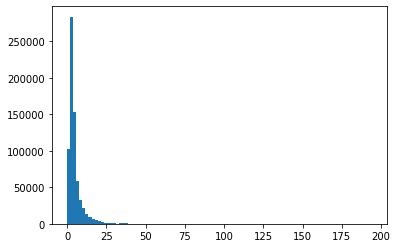

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([l for l in seq_lens if l < 200], bins=100);

# Create model

In [236]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D

In [237]:
def plot_history(history):
    
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.sca(ax[0])
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.sca(ax[1])
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [242]:
# Define an evaluation function to print the evaluation result
def evaluation_report(model,features,labels):
    
    # Calculate result
    result = model.evaluate(features,labels,verbose=False)
    
    # Predict and convert into a class
    pred_class = model.predict(features).argmax(axis=1)
    
    # Show report
    print(confusion_matrix(labels,pred_class))
    print(classification_report(labels,pred_class))
    print("Loss: %s Accuracy: %s" %(result[0],result[1]))
    
    return pred_class

In [265]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# checkpoint
filepath="./model/lstm-best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)]

In [266]:
# Define model
lstm = models.Sequential()
lstm.add(layers.Embedding(max_word,embedding_size,input_length=max_len))
lstm.add(layers.SpatialDropout1D(0.2))
lstm.add(layers.LSTM(512))
#lstm.add(layers.LeakyReLU(alpha=0.01))
lstm.add(layers.Dense(256,activation='relu'))
lstm.add(layers.Dropout(0.2))
lstm.add(layers.Dense(12,activation='softmax'))

# Compile model
lstm.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
lstm.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 30, 128)           2560000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 12)                1548      
Total params: 2,709,644
Trainable params: 2,709,644
Non-trainable params: 0
_________________________________________________________________


In [267]:
# Fit model
his =  lstm.fit(x_train_pad,yy_train,epochs=30,batch_size=256,validation_data=(x_val_pad,yy_val),callbacks=callbacks_list)

C:\Users\super\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 331954 samples, validate on 82989 samples
Epoch 1/30
331954/331954 [==============================] - 70s 212us/step - loss: 1.3524 - acc: 0.5483 - val_loss: 1.1140 - val_acc: 0.6233

Epoch 00001: val_acc improved from -inf to 0.62330, saving model to ./model/lstm-best.h5
Epoch 2/30
331954/331954 [==============================] - 69s 209us/step - loss: 1.0351 - acc: 0.6478 - val_loss: 1.0676 - val_acc: 0.6402

Epoch 00002: val_acc improved from 0.62330 to 0.64024, saving model to ./model/lstm-best.h5
Epoch 3/30
331954/331954 [==============================] - 68s 206us/step - loss: 0.9519 - acc: 0.6721 - val_loss: 1.0529 - val_acc: 0.6491

Epoch 00003: val_acc improved from 0.64024 to 0.64915, saving model to ./model/lstm-best.h5
Epoch 4/30
331954/331954 [==============================] - 69s 209us/step - loss: 0.8946 - acc: 0.6879 - val_loss: 1.0539 - val_acc: 0.6532

Epoch 00004: val_acc improved from 0.64915 to 0.65320, saving model to ./model/lstm-best.h5
Epoch 5/30
33195

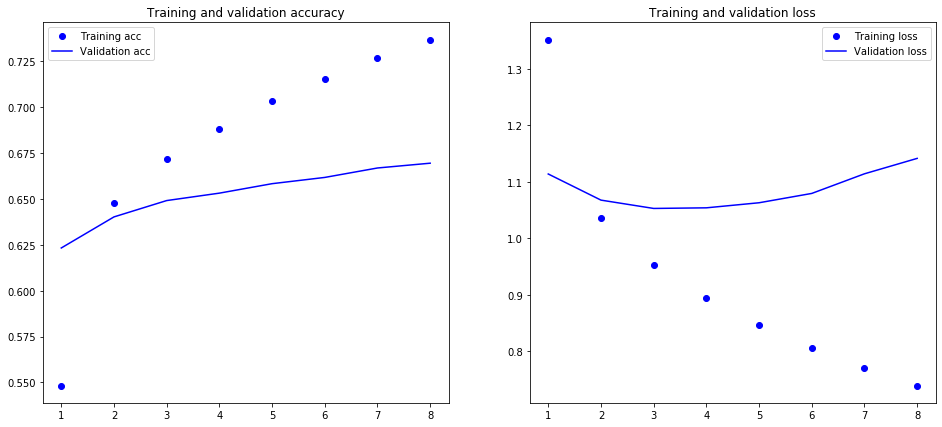

In [268]:
plot_history(his)

# Evaluate model

In [269]:
# Evaluate model
score, acc = lstm.evaluate(x_test_pad, yy_test, batch_size=256)
print('Test loss:', score)
print('Test accuracy:', acc)

46105/46105 [==============================] - 4s 87us/step
Test loss: 1.1340092092904361
Test accuracy: 0.6681488156318665


In [270]:
evaluation_report(lstm,x_test_pad,yy_test)

[[1137  259  113    8   39   10  133   11   15    1   12   53]
 [ 221 2801  270   35  165   21  491   51   37   22   70  185]
 [  35  173 2703   58  146   29  389   14   18    9   34  123]
 [   4   69  115 2987  265   75  375   35   17   11   44   53]
 [  25   94   95  109 4213   92  751  226   86   29  116  106]
 [   5   57   48  110  222 1880  404   31    8    4   24   58]
 [  30  162  218   87  510   72 4236   78   54   45  134  216]
 [   4   58   41   39  286   15  367 2008  402   73  100   56]
 [  11   63   39   27  205   12  321  622 1476   66  152   45]
 [   5   32    7   14   96   12  188   89   73  854   13   25]
 [  10  117   84   66  353   21  538  178  160   23 2849  122]
 [  29  154  128   41  255   35  617   55   32   11   94 3661]]
              precision    recall  f1-score   support

           0       0.75      0.63      0.69      1791
           1       0.69      0.64      0.67      4369
           2       0.70      0.72      0.71      3731
           3       0.83   

array([7, 2, 4, ..., 2, 6, 1], dtype=int64)

In [169]:
text_test = ["หน้าจอ 6.4 นิ้ว ความละเอียด 3040x1440 Quad HD+ (550 ppi)กล้องหลัง 3 ตัว (16 MP f/2.2 (Ultra Wide),12 MP f/1.5 & 2.4 (Wide), 12 MP f/2.4 (Tele))กล้องหน้า 2 ตัว (10 MP f/1.9 (Main), 8 MP f/2.2 (Live Focus)หน่วยประมวลผล Octa-core Snapdragon 855, Octa-core Exynos9 9820Ram 8/512 GBแบตเตอรี่ 4,100 mAh (Typical)"]
text_test2 = ['กล้อง Motion Eye™ หลัง19 MP +หน้า 13 MP พร้อมสุดยอดสโลว์โมชั่น ซูม8เท่า RAM 4GB+ROM 64GB เพิ่มเมมสูงสุด 256GB กันน้ำตามมาตราฐาน IP68 ถ่ายรูปโดนน้ำสบายมาก*หน้าจอ 5.2 นิ้ว TRILUMINOS™ CPU Qualcomm® Snapdragon™ 820แบตเตอรี่ 2900mAh + Sony Quick Charge']
text_test3 = ["CPU Intel Core i3-2350M @2.30 GHz หน้าจอขนาด 15.6” Full HD (1920 x 1080) HDD : 250 GB RAM: DDR3 4 GB Port : USB 2.0 x 4,VGA/ LAN port USB WiFi, DVD-ROM Battery Li-ion การ์ดจอ : Intel HD Graphics 3000 on board Battery 1-2 ชม+- #ผลิตในประเทศญี่ปุ่น คุณภาพมากกว่า 95% ฟรีเกมส์ 200 เกมส์ เล่นได้เลยไม่ต้องต่อเน็ต รับประกันสภาพสินค้าทุกชิ้น 95%+ รับประกันสินค้า 3 เดือน Condition: สินค้าหมดสัญญาเช่า รีวิวเกมส์ออนไลน์ ROV Frefire, Call of duty: https://youtu.be/qKqpGk8Ni7w"]

def test_lstm(text_test):
    clean_text_test = [clean_msg(text) for text in text_test]
    word_list_test = ['|'.join(split_word(txt)) for txt in clean_text_test]
    x_preprocess_test,x_seq_test = preprocess_fn(word_list_test)

    labels = ['โทรศัพท์มือถือ','แท็บเล็ต','แล็ปท็อป','คอมพิวเตอร์แบบตั้งโต๊ะ','กล้อง DSLR','กล้องมิลเลอร์เลส','โดรน','โทรทัศน์และวิดิโอ','เครื่องใช้ไฟฟ้าขนาดเล็ก','เสื้อผ้าผู้ชาย','รองเท้าผู้ชาย','ห้องนอน','ห้องน้ำ']
    pred = lstm.predict(x_preprocess_test).argmax(axis=1)
    print(clean_text_test)
    print(pred,'-->',labels[int(pred)])

test_lstm(["ขนาดหน้าจอ 8.0 นิ้วความละเอียดหน้าจอ: 1280 x 800 พิกเซล ระบบปฏิบัติการ : Android 9.0 (Oreo) หน่วยประมวลผล : MTK MT8321 32 Bit /Quad Core ความเร็ว 1.3GHz แรม : 2GB / รอม : 32GB หน่วยความจำภายนอก : รองรับ SD Card การ์ดได้สูงสุดถึง 128GB รองรับสัญญาณ Dual WiFi 2.4GHz ความจุแบตเตอรี่: 5500mAh (Built-in)"])

['ขนาดหน้าจอ 8.0 นิ้วความละเอียดหน้าจอ 1280 x 800 พิกเซล ระบบปฏิบัติการ Android 9.0 Oreo หน่วยประมวลผล MTK MT8321 32 Bit Quad Core ความเร็ว 1.3GHz แรม 2GB รอม 32GB หน่วยความจำภายนอก รองรับ SD Card การ์ดได้สูงสุดถึง 128GB รองรับสัญญาณ Dual WiFi 2.4GHz ความจุแบตเตอรี่ 5500mAh Builtin']
[1] --> แท็บเล็ต


# Others model

## bidirectional-LSTM

In [271]:
# Hyperparameter
batch_size = 256
epochs = 30

# checkpoint
filepath="./model/lstm-bidirectional.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)]

In [273]:
# Define the model
lstm2 = Sequential()
lstm2.add(Embedding(max_word, embedding_size, input_length=max_len))
lstm2.add(layers.SpatialDropout1D(0.1))
lstm2.add(layers.Bidirectional(LSTM(64)))
lstm2.add(layers.Dense(128,activation='relu'))
lstm2.add(Dropout(0.2))
lstm2.add(layers.Dense(12,activation='softmax'))

# Complie the model
lstm2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
lstm2.summary()

# Fit the model
his2 = lstm2.fit(x_train_pad, yy_train,
          batch_size=batch_size,
          epochs=epochs,
               validation_data=(x_val_pad,yy_val),
                callbacks=callbacks_list)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 30, 128)           2560000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 30, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 12)                1548      
Total params: 2,676,876
Trainable params: 2,676,876
Non-trainable params: 0
___________________________________________

C:\Users\super\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 331954 samples, validate on 82989 samples
Epoch 1/30
331954/331954 [==============================] - 104s 314us/step - loss: 1.3909 - acc: 0.5376 - val_loss: 1.1330 - val_acc: 0.6184

Epoch 00001: val_acc improved from -inf to 0.61843, saving model to ./model/lstm-bidirectional.h5
Epoch 2/30
331954/331954 [==============================] - 102s 308us/step - loss: 1.0547 - acc: 0.6437 - val_loss: 1.0779 - val_acc: 0.6346

Epoch 00002: val_acc improved from 0.61843 to 0.63459, saving model to ./model/lstm-bidirectional.h5
Epoch 3/30
331954/331954 [==============================] - 100s 303us/step - loss: 0.9690 - acc: 0.6678 - val_loss: 1.0571 - val_acc: 0.6457

Epoch 00003: val_acc improved from 0.63459 to 0.64569, saving model to ./model/lstm-bidirectional.h5
Epoch 4/30
331954/331954 [==============================] - 103s 311us/step - loss: 0.9108 - acc: 0.6854 - val_loss: 1.0537 - val_acc: 0.6532

Epoch 00004: val_acc improved from 0.64569 to 0.65323, saving model to ./mode

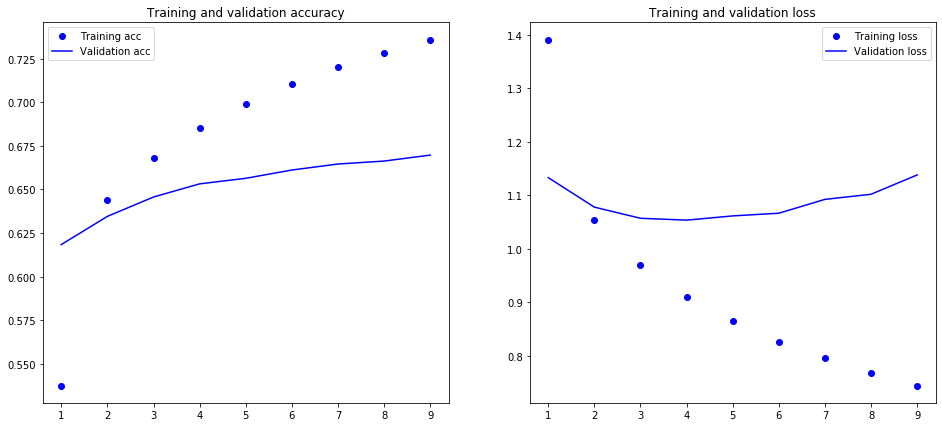

In [274]:
plot_history(his2)

In [275]:
# Evaluate model
score, acc = lstm2.evaluate(x_test_pad, yy_test, batch_size=batch_size)
print('Test loss:', score)
print('Test accuracy:', acc)

46105/46105 [==============================] - 5s 118us/step
Test loss: 1.126341498504426
Test accuracy: 0.6706430912017822


In [276]:
evaluation_report(lstm2,x_test_pad,yy_test)

[[1165  251  115   10  119    7   56   11   14    4   11   28]
 [ 214 2836  278   32  379   26  320   36   27   22   61  138]
 [  38  173 2731   54  296   34  260   14   15    5   37   74]
 [   8   65  135 2958  428  118  208   22   17   12   40   39]
 [  21   91   99   96 4601   99  467  150   92   32  124   70]
 [   5   54   46  101  407 1914  225   14   11    9   17   48]
 [  33  165  237   66  817  105 4006   58   49   51  123  132]
 [   4   55   58   41  485   20  229 1892  413  104  103   45]
 [   9   64   52   28  389   21  188  542 1466  109  137   34]
 [   5   33   14    8  164   17  145   67   41  883   12   19]
 [   9  104   97   66  620   30  322  149  144   39 2862   79]
 [  42  144  160   40  525   35  363   39   41   17  100 3606]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1791
           1       0.70      0.65      0.67      4369
           2       0.68      0.73      0.70      3731
           3       0.85   

array([8, 2, 4, ..., 2, 6, 1], dtype=int64)

## CONV1D + LSTM

In [282]:
# Convolution
kernel_size = 3
filters = 256
pool_size = 4

# LSTM
lstm_output_size = 500

# Training
batch_size = 128
epochs = 30

# checkpoint
filepath="./model/lstm-conv1D.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint,EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)]

In [284]:
# Define the model
lstm3 = Sequential()
lstm3.add(Embedding(max_word, embedding_size, input_length=max_len))
lstm3.add(layers.SpatialDropout1D(0.1))
lstm3.add(Conv1D(filters, kernel_size, activation='relu'))
lstm3.add(layers.GlobalMaxPool1D())
#lstm3.add(MaxPooling1D(pool_size))
#lstm3.add(LSTM(lstm_output_size))
lstm3.add(layers.Dense(256,activation='relu'))
lstm3.add(Dropout(0.1))
lstm3.add(layers.Dense(12,activation='softmax'))

# Complie the model
lstm3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
lstm3.summary()

his3 = lstm3.fit(x_train_pad, yy_train,
          batch_size=batch_size,
          epochs=epochs,
               validation_data=(x_val_pad,yy_val),
                callbacks=callbacks_list)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 30, 128)           12927872  
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 30, 128)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 256)           98560     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 12)              

C:\Users\super\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 331954 samples, validate on 82989 samples
Epoch 1/30
331954/331954 [==============================] - 53s 159us/step - loss: 1.2533 - acc: 0.5807 - val_loss: 1.0720 - val_acc: 0.6380

Epoch 00001: val_acc did not improve from 0.68954
Epoch 2/30
331954/331954 [==============================] - 53s 160us/step - loss: 0.9483 - acc: 0.6762 - val_loss: 1.0077 - val_acc: 0.6611

Epoch 00002: val_acc did not improve from 0.68954
Epoch 3/30
331954/331954 [==============================] - 52s 156us/step - loss: 0.8288 - acc: 0.7128 - val_loss: 0.9936 - val_acc: 0.6729

Epoch 00003: val_acc did not improve from 0.68954
Epoch 4/30
331954/331954 [==============================] - 53s 160us/step - loss: 0.7512 - acc: 0.7361 - val_loss: 1.0349 - val_acc: 0.6788

Epoch 00004: val_acc did not improve from 0.68954
Epoch 5/30
331954/331954 [==============================] - 52s 157us/step - loss: 0.7015 - acc: 0.7519 - val_loss: 1.0749 - val_acc: 0.6820

Epoch 00005: val_acc did not improve fr

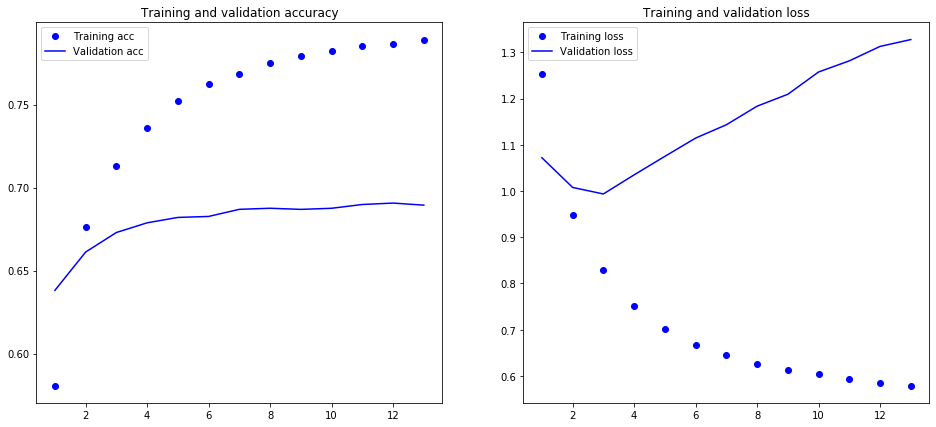

In [285]:
plot_history(his3)

In [286]:
# Evaluate model
score, acc = lstm3.evaluate(x_test_pad, yy_test, batch_size=batch_size)
print('Test loss:', score)
print('Test accuracy:', acc)

46105/46105 [==============================] - 1s 22us/step
Test loss: 1.32143837833932
Test accuracy: 0.689990222454071


In [287]:
evaluation_report(lstm3,x_test_pad,yy_test)

[[1159  257  113   11   21    7  153   17    7    2   12   32]
 [ 179 2933  246   34   77   35  587   33   27   19   95  104]
 [  20  158 2752   57   70   55  477   18   16    6   35   67]
 [   5   52   93 3072  105  116  485   30   13   11   39   29]
 [  19   81   69   97 4094  101  977  149   73   39  158   85]
 [   6   34   37   86   56 2000  528   26   11    7   25   35]
 [  18  168  190   81  222  131 4596   78   62   43  143  110]
 [   6   49   40   47  103   22  506 2116  327   92  111   30]
 [   5   66   34   28   81   20  429  637 1461   99  142   37]
 [   3   30   11    8   34    6  246   77   41  908   28   16]
 [   8   92   87   66  131   35  676  158  126   48 3016   78]
 [  18  178  113   30   78   45  735   52   31   21  106 3705]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1791
           1       0.72      0.67      0.69      4369
           2       0.73      0.74      0.73      3731
           3       0.85   

array([8, 1, 4, ..., 2, 9, 1], dtype=int64)

In [ ]:
# Plot model
from keras.utils import plot_model

plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)